In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Test with one node and 4 anchors

Load data

In [26]:
df_test_2 = pd.read_json('../node_positions-test-2.log', lines=True)
ref_test_2 = pd.read_json('../reference-test-2.json') # measured positions

Plot positions

<Axes: xlabel='x', ylabel='y'>

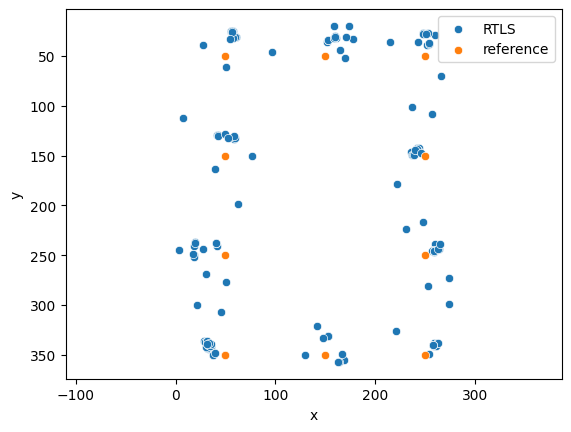

In [37]:
plt.axis('equal')
ax = sns.scatterplot(x='x', y='y', data=df_test_2, label='RTLS').invert_yaxis()
sns.scatterplot(x='x', y='y', data=ref_test_2, ax=ax, label='reference')

Calculate error

In [28]:
def ref_position(time: float) -> np.ndarray:
    pos = ref_test_2.loc[(ref_test_2['from'] <= time) & (ref_test_2['to'] >= time)]
    p = pos[['x', 'y']].values
    return p[0]
ref_position = np.vectorize(ref_position, signature='()->(n)')

def ref_mask(time: float) -> bool:
    pos = ref_test_2.loc[(ref_test_2['from'] <= time) & (ref_test_2['to'] >= time)]
    p = pos[['x', 'y']].values
    return True if p.size else False
ref_mask = np.vectorize(ref_mask)

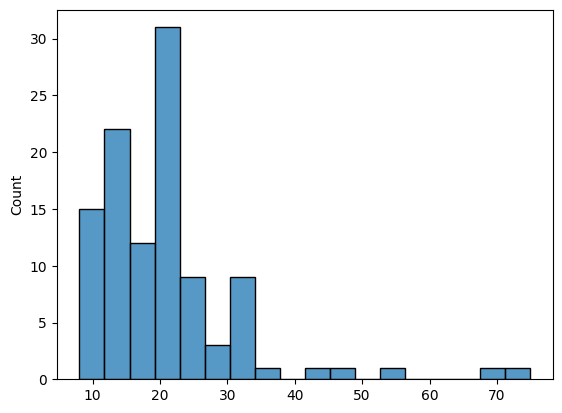

In [29]:
times = df_test_2['time'].values
mask = ref_mask(times)

times = times[mask]

rtls_positions = df_test_2[['x', 'y']].values[mask]
ref_positions = ref_position(times)

errors_2 = np.sqrt(((rtls_positions - ref_positions) ** 2).sum(axis=1))
errors_2_plot = sns.histplot(errors_2)

In [30]:
test_2_stats = {}
test_2_stats["MSE"] = np.mean(errors_2 ** 2)
test_2_stats["ME"] = np.mean(errors_2)
test_2_stats["Variance"] = errors_2.var()
test_2_stats["Standard deviation"] = np.sqrt(test_2_stats["Variance"])

for k, v in test_2_stats.items():
    print(f'{k}: {v:.2f}')

MSE: 553.60
ME: 20.85
Variance: 118.98
Standard deviation: 10.91


# Test with two nodes and 4 anchors

In [31]:
df_test_3 = pd.read_json('../node_positions-test-3.log', lines=True)
df_test_3 = df_test_3.loc[df_test_3["node"] == 98]
ref_test_3 = pd.read_json('../reference-test-3.json') 

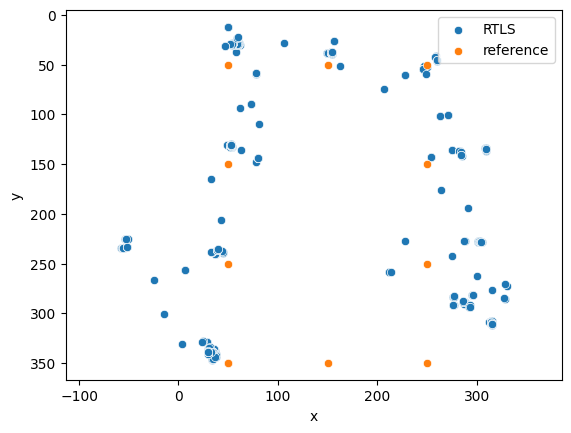

In [39]:
plt.axis('equal')
ax = sns.scatterplot(x='x', y='y', data=df_test_3, label='RTLS')
positions_3_plot = sns.scatterplot(x='x', y='y', data=ref_test_3, ax=ax, label='reference').invert_yaxis()

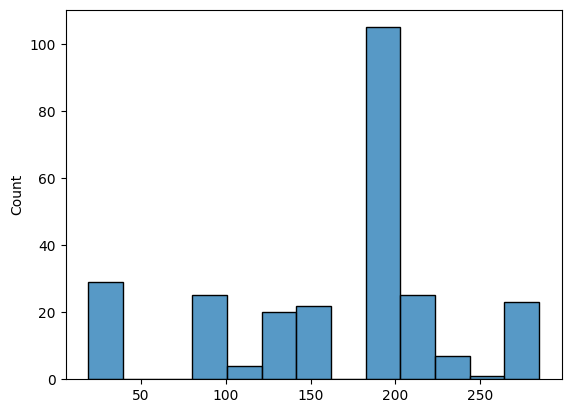

In [33]:
times = df_test_3['time'].values
mask = ref_mask(times)

times = times[mask]

rtls_positions = df_test_3[['x', 'y']].values[mask]
ref_positions = ref_position(times)

errors_3 = np.sqrt(((rtls_positions - ref_positions) ** 2).sum(axis=1))
errors_3_plot = sns.histplot(errors_3)

In [34]:
test_3_stats = {}
test_3_stats["MSE"] = np.mean(errors_3 ** 2)
test_3_stats["ME"] = np.mean(errors_3)
test_3_stats["Variance"] = errors_3.var()
test_3_stats["Standard deviation"] = np.sqrt(test_3_stats["Variance"])

for k, v in test_3_stats.items():
    print(f'{k}: {v:.2f}')

MSE: 31354.37
ME: 163.40
Variance: 4654.19
Standard deviation: 68.22


# Compare errors over time for both tests

In [35]:
times_2 = df_test_2['time'].values
mask_2 = ref_mask(times_2)
times_2 = times_2[mask_2]

times_3 = df_test_3['time'].values
mask_3 = ref_mask(times_3)
times_3 = times_3[mask_3]

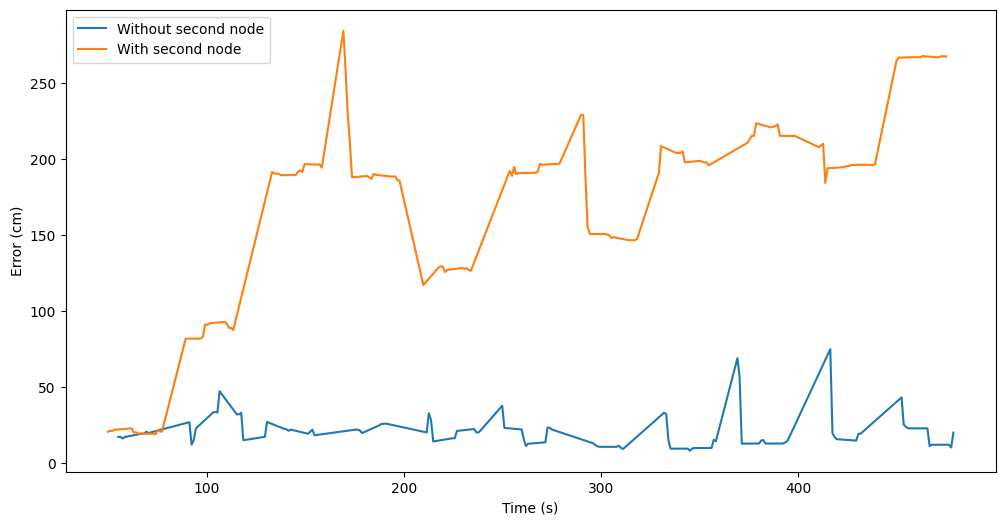

In [36]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=times_2, y=errors_2, label='Without second node')
sns.lineplot(x=times_3, y=errors_3, label='With second node')

plt.xlabel('Time (s)')
plt.ylabel('Error (cm)')
plt.legend()